<a href="https://colab.research.google.com/github/MdSami786/Spotify-Data-Visualization-using-Python/blob/main/Spotify_Data_visualization_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXPLORATORY DATA ANALYSIS ON SPOTIFY DATASET (1921-2020)**





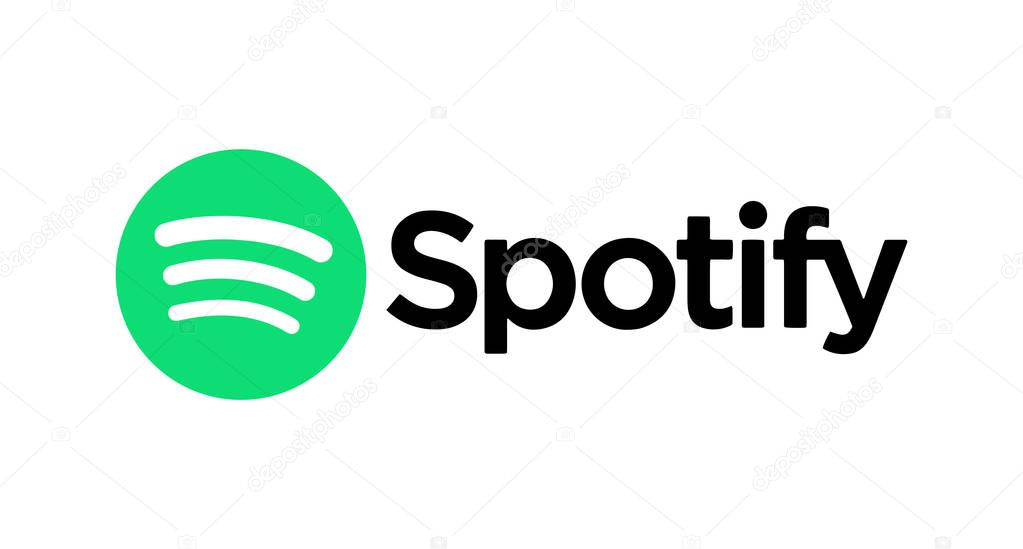

**1. id: Id of track generated by Spotify**

**2. artists: List of artists mentioned**

**3. name: Name of the Song.**

**4. genres: Genre of the Song.**

**5. year: Range from 1921 to 2020.**

**6. duration_ms: Integer typically ranging from 200k to 300k.**

**7. mode: 0 = Minor, 1 = Major.**

**8. explicit: 0 = No explicit content, 1 = Explicit content.**

**9. key: All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on.**

**10. popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular.**

**11. acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.**

**12. danceability: A value of 0.0 is least danceable and 1.0 is most danceable.**

**13. energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.**

**14. instrumentalness: The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.**

**15. valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. High valence more positive.**

**16. tempo: The overall estimated tempo of a track in beats per minute (BPM).**

**17. liveness: Detects the presence of an audience in the recording. A value above 0.8 provides strong likelihood that the track is live.**

**18. loudness: The overall loudness of a track in decibels (dB). Float typically ranging from -60 to 0.**

**19. speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0**

## Used Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/project/data.csv")
genre_data=pd.read_csv("/content/drive/MyDrive/project/data_by_genres.csv")

In [ ]:
print(data.shape)
data.head()

(169909, 19)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


**Number of recordes - 169909**

**Number of fields - 19**

In [ ]:
print(genre_data.shape)
genre_data.head()

(2664, 14)


,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


**Number of recordes - 2664**

**Number of fields - 14**

In [ ]:
print("INFORMATION")
print(data.info())

INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo   

In [ ]:
print("INFORMATION")
print(genre_data.info())

INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2664 non-null   object 
 1   acousticness      2664 non-null   float64
 2   danceability      2664 non-null   float64
 3   duration_ms       2664 non-null   float64
 4   energy            2664 non-null   float64
 5   instrumentalness  2664 non-null   float64
 6   liveness          2664 non-null   float64
 7   loudness          2664 non-null   float64
 8   speechiness       2664 non-null   float64
 9   tempo             2664 non-null   float64
 10  valence           2664 non-null   float64
 11  popularity        2664 non-null   float64
 12  key               2664 non-null   int64  
 13  mode              2664 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 291.5+ KB
None


## Data Cleaning

In [ ]:
data['duration_min'] = data['duration_ms']/60000
data['duration_min'] = data['duration_min'].round(2)
genre_data['duration_min'] = genre_data['duration_ms']/60000
genre_data['duration_min'] = genre_data['duration_min'].round(2)
print(data['duration_min'].head())
print(genre_data['duration_min'].head())

0     2.64
1     4.70
2     1.74
3     3.01
4    11.46
Name: duration_min, dtype: float64
0    17.48
1     3.83
2     3.23
3     5.72
4     3.90
Name: duration_min, dtype: float64


In [ ]:
data.drop(['id','release_date','duration_ms'],inplace=True,axis=1)
data.head()

,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,duration_min
0,0.995,['Carl Woitschach'],0.708,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,2.64
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,4.70
2,0.604,['Seweryn Goszczyński'],0.749,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,1.74
3,0.995,['Francisco Canaro'],0.781,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,3.01
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,11.46


In [ ]:
data.isnull().sum().sum()

0

In [ ]:
genre_data.isnull().sum().sum()

0

## Songs with Highest Duration

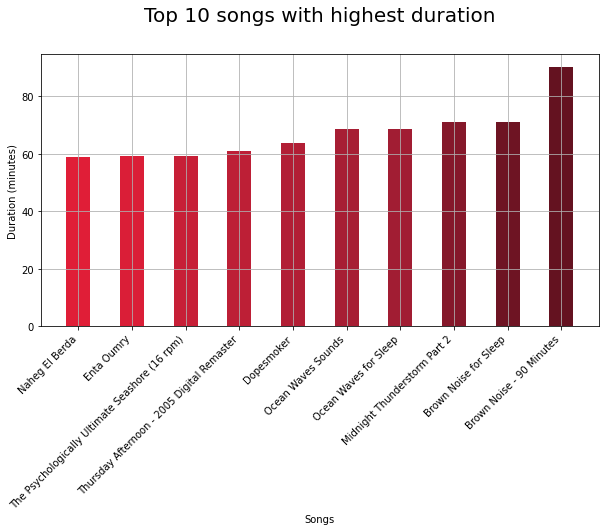

In [ ]:
top = data[['name','duration_min']].sort_values('duration_min').tail(10)
plt.figure(figsize=(10,5))
plt.bar( top['name'],
         top['duration_min'],
         width=0.45,
         color = ['#E01E37','#DA1E37','#C71F37','#BD1F36','#B21E35','#A71E34','#A11D33','#85182A','#6E1423','#641220'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 songs with highest duration',y=1.1,fontsize=20)
plt.xlabel('Songs')
plt.ylabel('Duration (minutes)')
plt.grid()
plt.show()

#### **Songs with highest duration : Brown Noise - 90 Minutes.**

## Most Popular tracks from 1921-2020

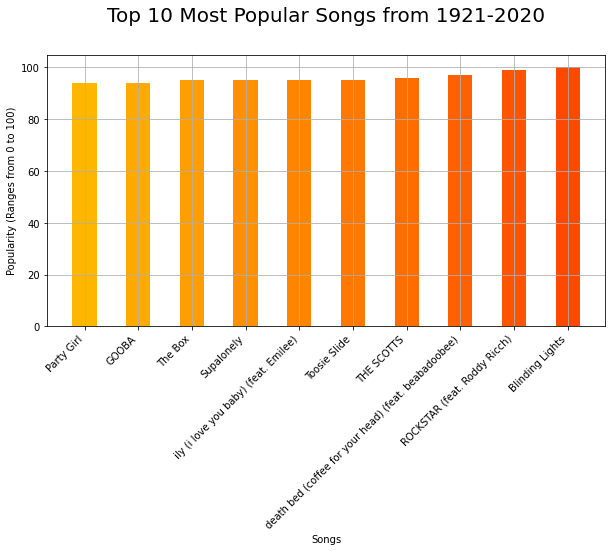

In [ ]:
pop = data[['name','popularity']].sort_values('popularity').tail(10)
plt.figure(figsize=(10,5))
plt.bar( pop['name'],
         pop['popularity'],
         width=0.45,
         color = ['#FFB600','#FFAA00','#FF9E00','#FF9100','#FF8500','#FF7900','#FF6D00','#FF6000','#FF5400','#FF4800'])
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 Most Popular Songs from 1921-2020',y=1.1,fontsize=20)
plt.xlabel('Songs')
plt.ylabel('Popularity (Ranges from 0 to 100)')
plt.grid()
plt.show()

#### **Most Popular track from 1921-2020: Blinding Lights.**

## Most Popular Artists from 1921-2020

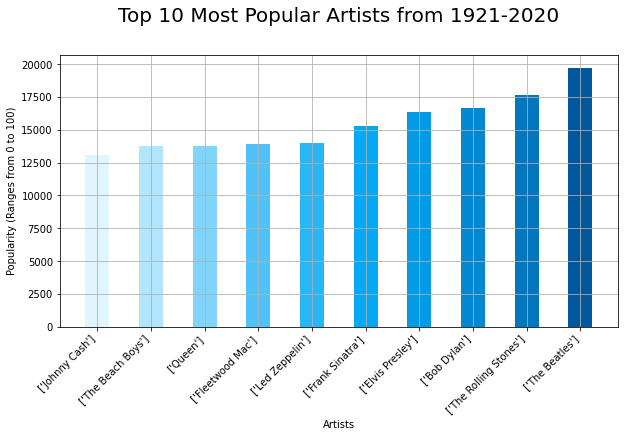

In [ ]:
arpop=data.groupby('artists')['popularity']
a1=arpop.sum().sort_values().tail(10).reset_index(level='artists')
plt.figure(figsize=(10,5))
plt.bar( a1['artists'],
         a1['popularity'],
         width=0.45,
         color = ['#E1F5FE', '#B3E5FC', '#81D4FA', '#4FC3F7', '#29B6F6', '#03A9F4', '#039BE5', '#0288D1', '#0277BD', '#01579B'])
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 Most Popular Artists from 1921-2020',y=1.1,fontsize=20)
plt.xlabel('Artists')
plt.ylabel('Popularity (Ranges from 0 to 100)')
plt.grid()
plt.show()

#### **Most Popular artist from 1921-2020: The Beatles.**

## Most Happy and Cheerful type of Songs

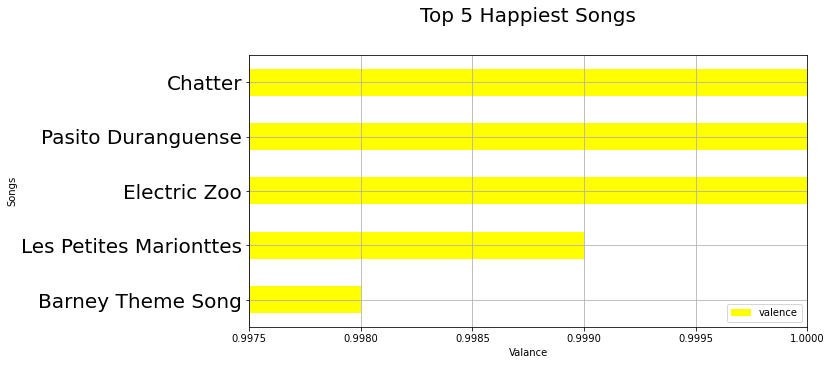

In [ ]:
df = data[['valence','name']]
df1=df.sort_values('valence').tail().set_index('name')
df1.plot(kind='barh', 
          figsize = (10, 5), 
          width = 0.5,
          color='yellow')
t='Top 5 Happiest Songs'
plt.title(t,y=1.1,fontsize=20)
plt.xlabel('Valance')
plt.ylabel('Songs')
plt.yticks(fontsize=20)
plt.xlim(0.9975,1)
plt.grid()
plt.show()

#### **There are three most cheerful songs that are :**
####           **1: Chatter**
####           **2: Pasito Duranguense**
####           **3: Electric Zoo**

## Explicit Content Ratio

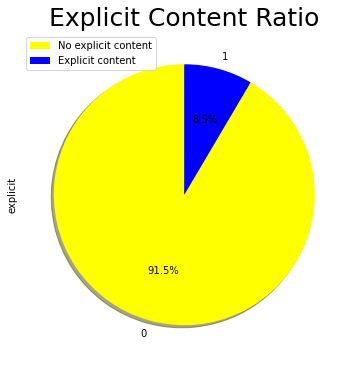

In [ ]:
colors_list = ['yellow','blue']
ex = data['explicit']
a=ex.value_counts()
a.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%', 
            startangle=90,  
            shadow=True,       
            colors=colors_list,
            )
plt.title('Explicit Content Ratio', fontsize=25) 
plt.legend(labels=['No explicit content','Explicit content'], loc='upper left') 
plt.show()

#### **On Spotify, 91.5% of songs are Non-Explicit and 8.5% of Songs are Explicit.**

## Number of Songs Released Year Wise 

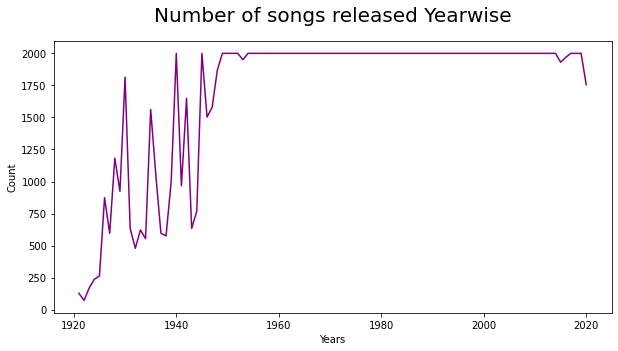

In [ ]:
year = data['year']
a= year.value_counts()
b= a.sort_index()
b.plot(kind='line',figsize=(10,5) ,color='purple')
plt.title("Number of songs released Yearwise",y=1.05,fontsize=20)
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

#### **Nearly about 2000 songs are added on Spotify each year.**

## Trend Analysis Year Wise

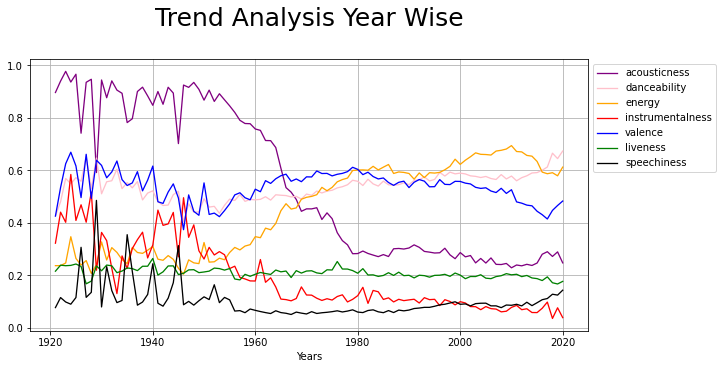

In [ ]:
variables = ['acousticness','danceability','energy','instrumentalness','valence','liveness','speechiness']
color = ['purple','pink','orange','red','blue','green','black']
df= data.groupby('year')[variables].mean().reset_index()
fig = plt.figure(figsize=(10,5))
l=[]
for i in range(len(variables)):
    x = str(i)
    plt.plot( 'year',variables[i],data=df,marker='',color=color[i],linewidth=1.3)
plt.legend(variables,bbox_to_anchor=(1,1))
plt.title("Trend Analysis Year Wise",y=1.1,fontsize=25)
plt.xlabel('Years')
plt.grid()
plt.show()

#### **Gradual decrease in Acousticness and Instrumentalness over the years.**

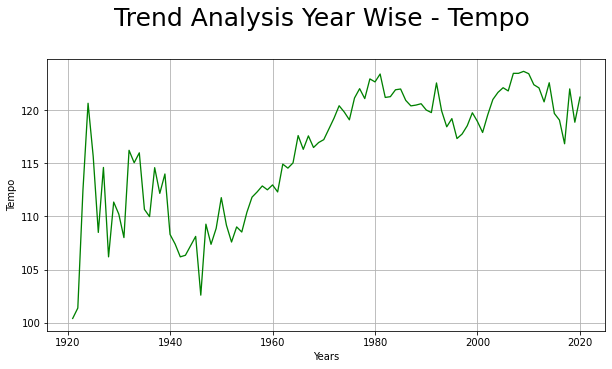

In [ ]:
df= data.groupby('year')['tempo'].mean().reset_index(level='year')
plt.figure(figsize=(10,5))
plt.plot( 'year','tempo',data=df,marker='',color='green',linewidth=1.3)
plt.title("Trend Analysis Year Wise - Tempo ",y=1.1,fontsize=25)
plt.xlabel('Years')
plt.ylabel("Tempo")
plt.grid()
plt.show()

#### **There is a gradual increase in Energy, Loudness and Tempo over the years.**

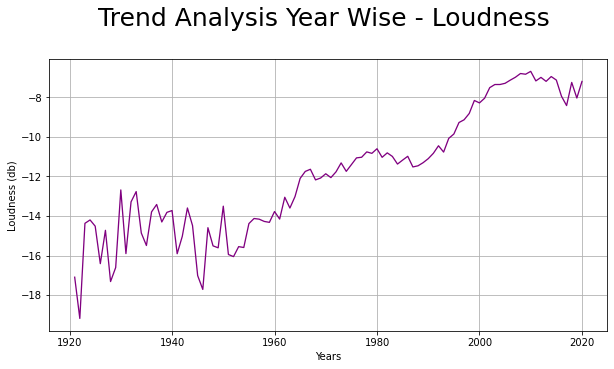

In [ ]:
df= data.groupby('year')['loudness'].mean().reset_index(level='year')
fig = plt.figure(figsize=(10,5))
plt.plot( 'year','loudness',data=df,marker='',color='purple',linewidth=1.3)
plt.title("Trend Analysis Year Wise - Loudness ",y=1.1,fontsize=25)
plt.xlabel('Years')
plt.ylabel('Loudness (db)')
plt.grid()
plt.show()

####  **There is not much of a change in Danceability, Valence, Liveness and Speechiness seen in the recent years.**

## Trend Analysis Popularity Wise

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the c

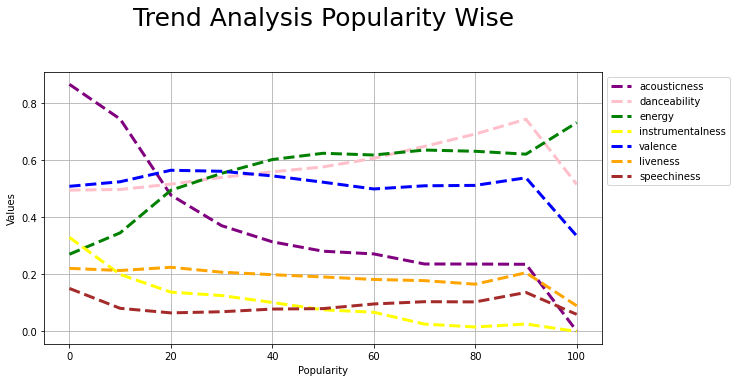

In [ ]:
df=data[['acousticness','danceability','energy','instrumentalness','valence','liveness','speechiness']]
df['popularity']=pd.DataFrame(data['popularity']/10).apply(np.floor)
df['popularity']=df['popularity']*10
df=df.groupby('popularity')['acousticness','danceability','energy','instrumentalness','valence','liveness','speechiness'].mean().reset_index()
color1=['purple','pink','green','yellow','blue','orange','brown']
fig = plt.figure(figsize=(10,5))
l=[]
variables = ['acousticness','danceability','energy','instrumentalness','valence','liveness','speechiness']
for i in range(len(variables)):
    x = str(i)
    l.append(x)
    plt.plot( 'popularity',variables[i],data=df,color=color1[i],linewidth=3,linestyle='--')
a=data[['acousticness','danceability','energy','instrumentalness','valence','liveness','speechiness']]
plt.legend(a,bbox_to_anchor=(1,1))
plt.title("Trend Analysis Popularity Wise",y=1.15,fontsize=25)
plt.xlabel('Popularity')
plt.ylabel('Values')
plt.grid()
plt.show()

#### **Songs having low values in Instrumentalness, Speechiness, Liveness and Acousticness are more popular.**


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


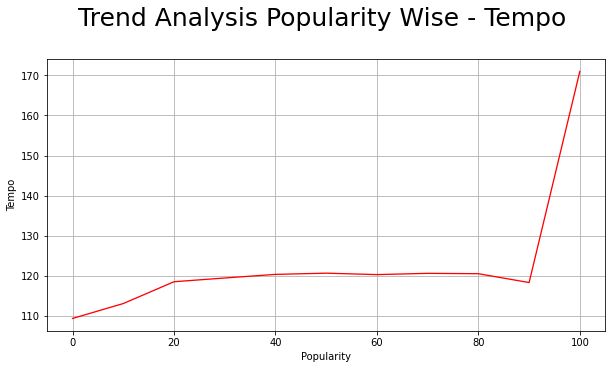

In [ ]:
tempo = data[['tempo','popularity']]
tempo['popularity']=pd.DataFrame(tempo['popularity']/10).apply(np.floor)
tempo['popularity']=tempo['popularity']*10
tempo=pd.DataFrame(tempo.groupby('popularity')['tempo'].mean()).reset_index(level="popularity")
fig = plt.figure(figsize=(10,5))
plt.plot( 'popularity','tempo',data=tempo,color='red',linewidth=1.3)
plt.title("Trend Analysis Popularity Wise - Tempo ",y=1.1,fontsize=25)
plt.xlabel('Popularity')
plt.ylabel('Tempo')
plt.grid()
plt.show()

#### **Songs having medium values in Valence and Danceability are more Popular.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


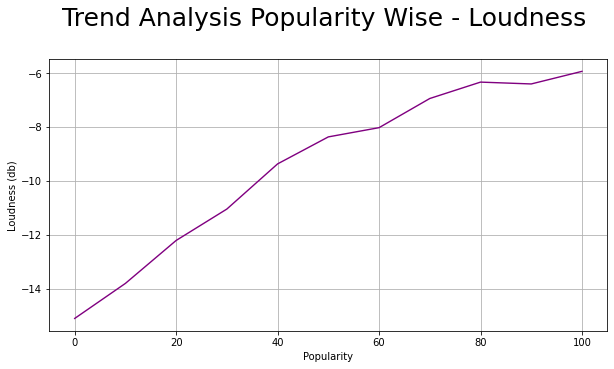

In [ ]:
loudness = data[['loudness','popularity']]
loudness['popularity']=pd.DataFrame(loudness['popularity']/10).apply(np.floor)
loudness['popularity']=loudness['popularity']*10
loudness=pd.DataFrame(loudness.groupby('popularity')['loudness'].mean()).reset_index(level='popularity')
fig = plt.figure(figsize=(10,5))
plt.plot( 'popularity','loudness',data=loudness,color='purple',linewidth=1.4)
plt.title("Trend Analysis Popularity Wise - Loudness ",y=1.1,fontsize=25)
plt.xlabel('Popularity')
plt.ylabel('Loudness (db)')
plt.grid()
plt.show()

#### **Songs having high Energy, Loudness and Tempo are more Popular.**

## Mode Ratio

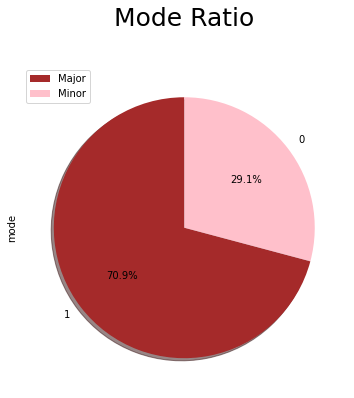

In [ ]:
colors_list = ['brown','pink']
md = data['mode']
md1= md.value_counts()
md1.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%', 
            startangle=90,  
            shadow=True,           
            colors=colors_list)

plt.title('Mode Ratio',y=1.1,fontsize=25) 
plt.legend(labels=['Major','Minor'], loc='upper left') 
plt.show()

#### **On Spotify, 70.9% of songs are with Major Scale and 29.1% of songs are with Minor Scale.**

## What is the Most Frequent Key ?

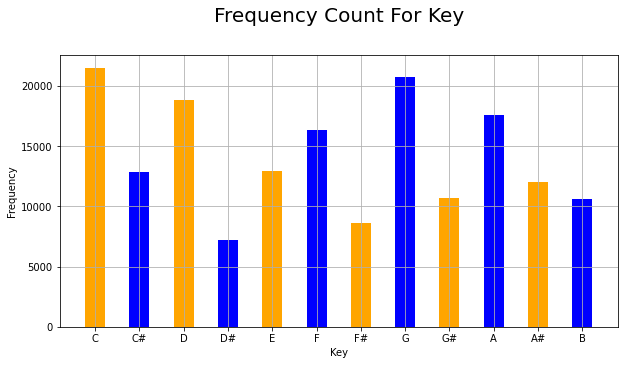

In [ ]:
key = pd.DataFrame(data['key'].value_counts()).reset_index().sort_values('index')
key.replace({'index' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)
fig = plt.figure(figsize=(10,5))
plt.bar( key['index'],
         key['key'],
         width=0.45,
         color = ['orange','blue'])
plt.title('Frequency Count For Key',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#### **Most Frequent key is C, followed by G.**

## How key affects the Popularity ?

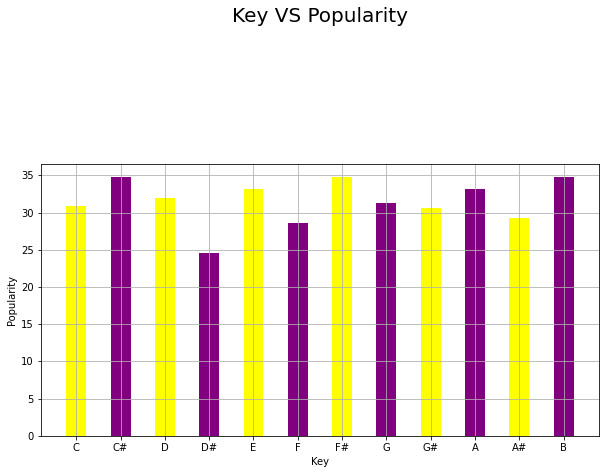

In [ ]:
keypop = pd.DataFrame(data.groupby('key')['popularity'].mean()).reset_index()
keypop.replace({'key' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)

fig = plt.figure(figsize=(10,5))
plt.bar( keypop['key'],
         keypop['popularity'],
         width=0.45,
         color = ['yellow','purple'])
plt.title('Key VS Popularity',y=1.5,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Popularity')
plt.grid()
plt.show()

#### **Keys with Highest Popularities are F#, B, C#.**

## Most Popular Genres

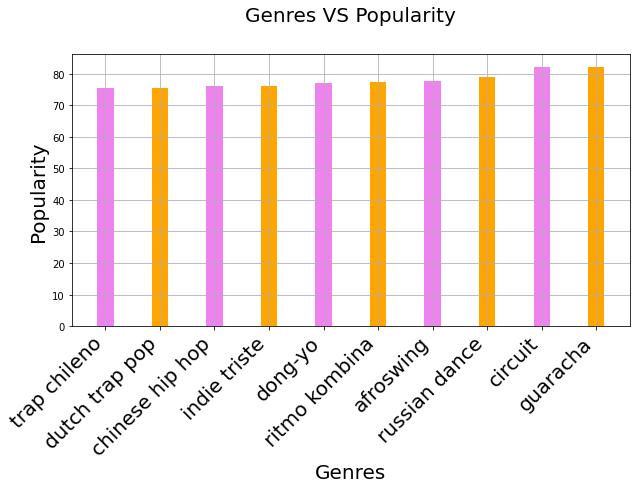

In [ ]:
x=genre_data.sort_values('popularity').tail(10)
fig = plt.figure(figsize=(10,5))
plt.bar( x['genres'],
         x['popularity'],
         width=0.3,
         color = ['violet','orange'])
plt.title('Genres VS Popularity',y=1.1,fontsize=20)
plt.xlabel('Genres',fontsize=20)
plt.ylabel('Popularity',fontsize=20)
plt.xticks(fontsize=20,rotation=45,ha='right')
plt.grid()
plt.show()

#### **The top Genres are: 1. Guaracha  2. Circuit  3. Russian Dance  4. Afroswing  5. Ritmo Kombina.**